# Tarea 11

Fecha de entrega: 21/Septiembre/2017

Por _Diana López Angeles_

In [1]:
using PyPlot

### Ejercicio 1

Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

In [2]:
function f(x,t)
    -(2.5)*x
end;

In [3]:
function metodo_euler(f,x0,t0,tf,h)      #Nuestra función con nuestros inputs necesarios.
    n=round((tf-t0)/h)+1                 
    listt=linspace(t0,tf,n)             
    listx=zeros(n)                      #Una lista de zeros para guardar nuestros datos.
    listx[1]=x0                         #El valor inicial
    for i in 1:length(listx)-1          #Ciclo for para obtener nuestras listas
        listx[i+1]=listx[i]+h*f(listx[i],listt[i])
    end
    return listt, listx
end;

* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [4]:
function q(x,t)
    exp.(-5t/2)
end;

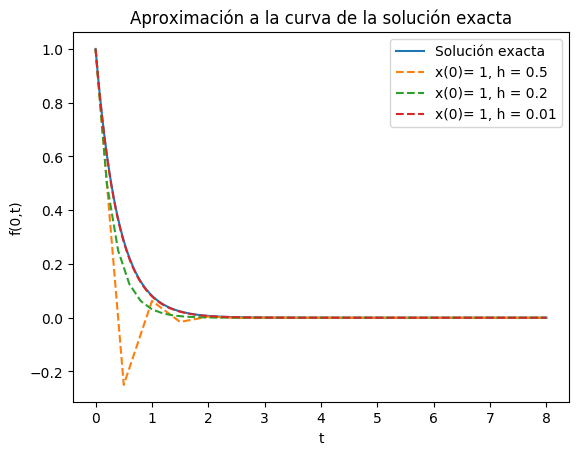

In [5]:
t = linspace(0,8,100000)
xlabel("t")
ylabel("f(0,t)")
title("Aproximación a la curva de la solución exacta")
plot(t,q(1,t),label="Solución exacta");
plot(metodo_euler(f,1,0,8,0.5)[1],metodo_euler(f,1,0,8,0.5)[2],"--", label = "x(0)= 1, h = 0.5");
plot(metodo_euler(f,1,0,8,0.2)[1],metodo_euler(f,1,0,8,0.2)[2],"--", label = "x(0)= 1, h = 0.2");
plot(metodo_euler(f,1,0,8,0.01)[1],metodo_euler(f,1,0,8,0.01)[2],"--", label = "x(0)= 1, h = 0.01");
legend()
show()

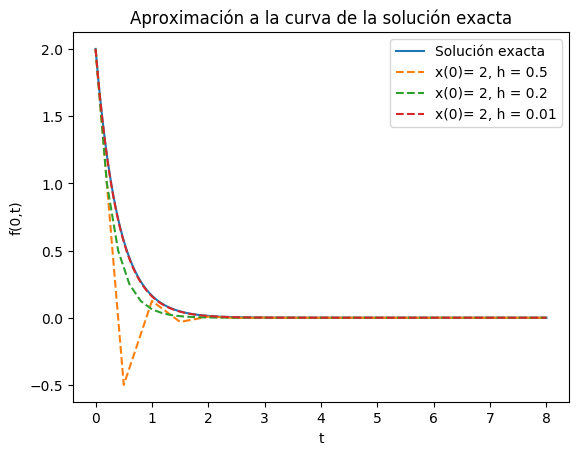

In [6]:
t = linspace(0,8,100000)
xlabel("t")
ylabel("f(0,t)")
title("Aproximación a la curva de la solución exacta")
plot(t,2*q(1,t),label="Solución exacta");
plot(metodo_euler(f,2,0,8,0.5)[1],metodo_euler(f,2,0,8,0.5)[2],"--", label = "x(0)= 2, h = 0.5");
plot(metodo_euler(f,2,0,8,0.2)[1],metodo_euler(f,2,0,8,0.2)[2],"--", label = "x(0)= 2, h = 0.2");
plot(metodo_euler(f,2,0,8,0.01)[1],metodo_euler(f,2,0,8,0.01)[2],"--", label = "x(0)= 2, h = 0.01");
legend()
show()

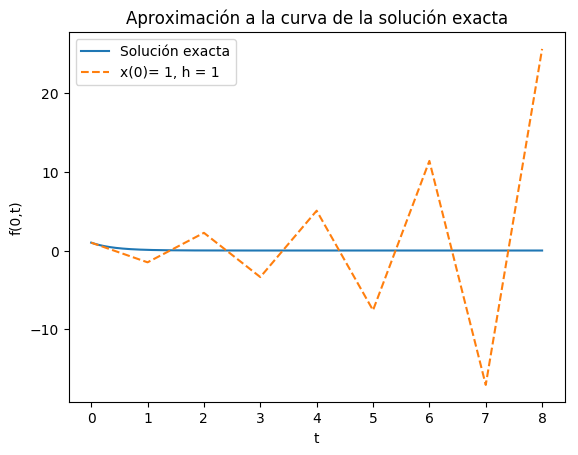

In [7]:
t = linspace(0,8,100000)
xlabel("t")
ylabel("f(0,t)")
title("Aproximación a la curva de la solución exacta")
plot(t,q(1,t),label="Solución exacta");
plot(metodo_euler(f,1,0,8,1)[1],metodo_euler(f,1,0,8,1)[2],"--", label = "x(0)= 1, h = 1");
legend()
show()

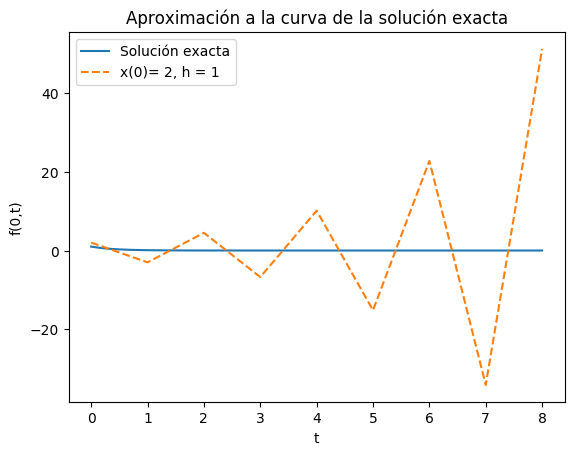

In [8]:
t = linspace(0,8,100000)
xlabel("t")
ylabel("f(0,t)")
title("Aproximación a la curva de la solución exacta")
plot(t,q(1,t),label="Solución exacta");
plot(metodo_euler(f,2,0,8,1)[1],metodo_euler(f,2,0,8,1)[2],"--", label = "x(0)= 2, h = 1");
legend()
show()

### Ejercicio 2

¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.

A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

Suponiendo que $k>0$ y haciendo $\omega^2=k$, tenemos un oscilador armónico, cuya solución conocemos desde mecanica vectorial:
$$x(t)=A\cos(\omega t)+B\sin(\omega t)$$
$$\dot{x}(t)=-A\omega\sin(\omega t)+B\omega\cos(\omega t)$$
Aplicando las condiciones iniciales $x(0)$ y $\dot{x}(0)$:
$$x(0)=A$$ $$\dot{x}(0)=B\omega$$
La solución de la ecuación diferencial es:
$${x(t)=x(0)\cos(\omega t)+\frac{\dot{x}(0)}{\omega}\sin(\omega t)}$$

### Ejercicio 3

Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Si llevaste a cabo el ejercicio anterior, te darás cuenta
que terminas con un sistema acoplado de ecuaciones
diferenciales:

$$
\dot{u} = -kx, \dot{x} = u,
$$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$
donde $\vec x=(x,u)$, y para este caso es facil ver que $\vec f(\vec x,t)=(u,-kx).$

Si se hacemos $u=\dot{x}(t)$, entonces tendriamos que $\dot{u}=\ddot{x}(t)=-kx$. Entonces tendríamos dos ecuaciones:

$$
\dot{x}(t)=u \\
$$
$$
\dot{u}=-kx \\
$$

### Ejercicio 4

Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

In [9]:
#El codigo que David hizo para sistemas de más de una dimensión, vamos a usar todo el metodo como esta explicado en el notebook

function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
    end;

In [10]:
#La función que queremos resolver.
f(x,t)=[x[2], -1.0*x[1]]

#Ponemos el intervalo donde queremos que lo grafique, [0,10]
list=0:0.01:10;

#Aqui vamos a guardar las soluciones con condiciones iniciales x(0)=0 y u(0)=2
soluciones_condiciones_iniciales=euler(f,list,[0,2]);

#Guardamos las soluciones en lists y la solución teórica tambien
listx1=map(x->x[1],soluciones_condiciones_iniciales);
listx2=map(x->x[2],soluciones_condiciones_iniciales);
listx_solucion_teorica=2*sin.(list); 
listx_derivada_solucion_teorica=2*cos.(list);

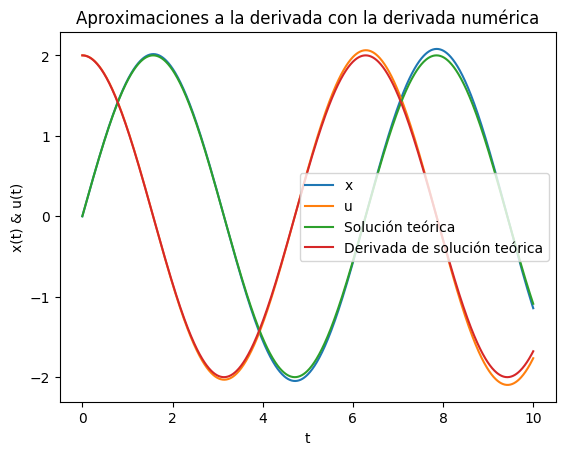

In [11]:
#Finalmente graficamos
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la derivada con la derivada numérica")
plot(list,listx1, label="x");
plot(list,listx2, label="u");
plot(list,listx_solucion_teorica, label="Solución teórica");
plot(list,listx_derivada_solucion_teorica, label="Derivada de solución teórica");
legend();

### Ejercicio 5

Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [12]:
function ecuacion_resolver(x,t)
    return (2x-18t)/(1+t);
end;

In [13]:
function solucion_exacta_e_resolver(t)
    return 4+8*t-5*(t*t);
end;

In [16]:
(t1, x1) = metodo_euler(ecuacion_resolver, 4.0, 0.0, 8.0, 1.0);
(t2, x2) = metodo_euler(ecuacion_resolver, 4.0, 0.0, 8.0, 0.1);

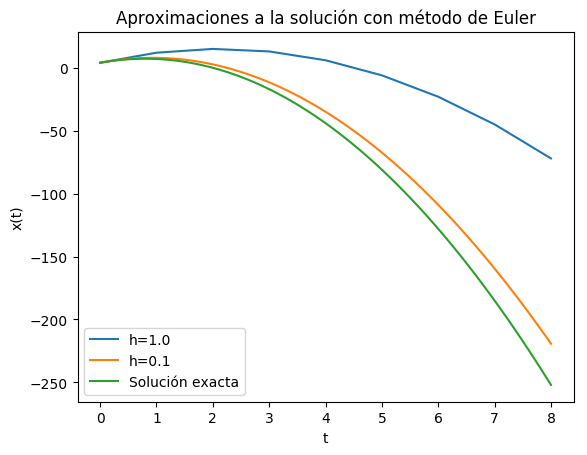

In [18]:
#Se grafican las cuatro soluciones numéricas y la solución teórica para el paso anterior
t = linspace(0,8,100)
xlabel("t");
ylabel("x(t)");
title("Aproximaciones a la solución con método de Euler");
plot(t1, x1, label="h=1.0");
plot(t2, x2, label="h=0.1");
plot(t, solucion_exacta_e_resolver.(t), label="Solución exacta");
legend();

Como ya habiamos visto cuando h tiende a cero la aproximación es muchisimo mejor.